**This notebook involves the clustering of heart beats. We will use K-Means, & Gaussian mixture models for clustering.**

### import required libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.cluster import KMeans, AffinityPropagation
from scipy.cluster.hierarchy import fcluster, ward, dendrogram

import warnings
warnings.filterwarnings('ignore')

### Load the datasets

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/MIT-BIH Arrhythmia Database /mitbih_train.csv', header=None)
df_test = pd.read_csv('/content/drive/MyDrive/MIT-BIH Arrhythmia Database /mitbih_test.csv', header=None)

In [ ]:
df_train.head(100)

0         1         2         3         4    ...  183  184  185  186  187
0   0.977941  0.926471  0.681373  0.245098  0.154412  ...  0.0  0.0  0.0  0.0  0.0
1   0.960114  0.863248  0.461538  0.196581  0.094017  ...  0.0  0.0  0.0  0.0  0.0
2   1.000000  0.659459  0.186486  0.070270  0.070270  ...  0.0  0.0  0.0  0.0  0.0
3   0.925414  0.665746  0.541436  0.276243  0.196133  ...  0.0  0.0  0.0  0.0  0.0
4   0.967136  1.000000  0.830986  0.586854  0.356808  ...  0.0  0.0  0.0  0.0  0.0
..       ...       ...       ...       ...       ...  ...  ...  ...  ...  ...  ...
95  1.000000  0.979021  0.706294  0.391608  0.059441  ...  0.0  0.0  0.0  0.0  0.0
96  0.940937  0.957230  0.374745  0.034623  0.008147  ...  0.0  0.0  0.0  0.0  0.0
97  0.930966  0.925049  0.453649  0.315582  0.319527  ...  0.0  0.0  0.0  0.0  0.0
98  1.000000  0.956879  0.642710  0.299795  0.229979  ...  0.0  0.0  0.0  0.0  0.0
99  0.489899  0.484848  0.636364  0.762626  0.752525  ...  0.0  0.0  0.0  0.0  0.0

[100 rows x 188 columns]

In [ ]:
df_train.shape

(87554, 188)

In [ ]:
df_test.head()

0         1         2         3         4    ...  183  184  185  186  187
0  1.000000  0.758264  0.111570  0.000000  0.080579  ...  0.0  0.0  0.0  0.0  0.0
1  0.908425  0.783883  0.531136  0.362637  0.366300  ...  0.0  0.0  0.0  0.0  0.0
2  0.730088  0.212389  0.000000  0.119469  0.101770  ...  0.0  0.0  0.0  0.0  0.0
3  1.000000  0.910417  0.681250  0.472917  0.229167  ...  0.0  0.0  0.0  0.0  0.0
4  0.570470  0.399329  0.238255  0.147651  0.000000  ...  0.0  0.0  0.0  0.0  0.0

[5 rows x 188 columns]

In [ ]:
df_test.shape

(21892, 188)

#### Let's see how our target variable distributed in our training data.

In [ ]:
#classes count
df_class=df_train[187].value_counts()
print('Count of classes :\n',df_class)
#Percentage of classes count
per_class=df_class/len(df_train)*100
print('percentage of count of classes :\n',per_class)

Count of classes :
 0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64
percentage of count of classes :
 0.0    82.772917
4.0     7.345181
2.0     6.610777
1.0     2.539005
3.0     0.732120
Name: 187, dtype: float64


Text(0, 0.5, 'Index')

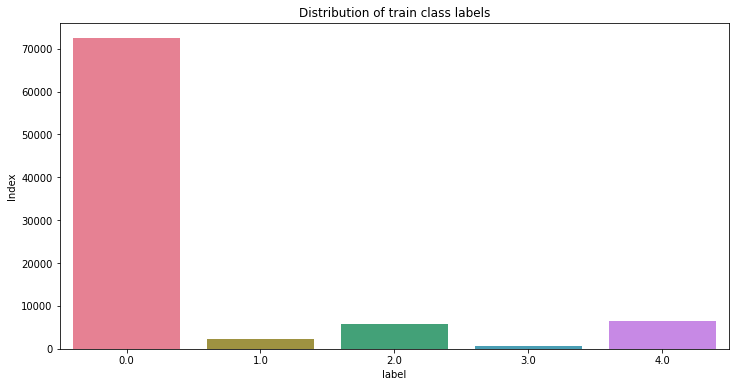

In [ ]:
#Countplot
plt.figure(figsize=(12,6))
sns.countplot(df_train[187],palette='husl')
plt.title('Distribution of train class labels')
plt.xlabel('label')
plt.ylabel('Index')

#### Let's see how our target variable distributed in our testing data.

Text(0, 0.5, 'Index')

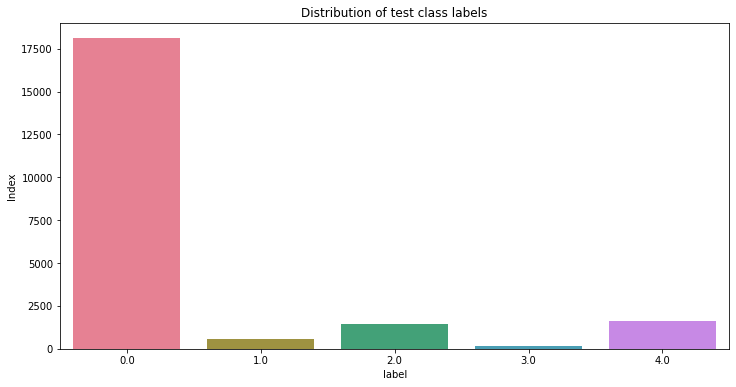

In [ ]:
#Countplot
plt.figure(figsize=(12,6))
sns.countplot(df_test[187],palette='husl')
plt.title('Distribution of test class labels')
plt.xlabel('label')
plt.ylabel('Index')

In [ ]:
# Convert target data type from float to int
df_train[187] = df_train[187].astype('uint8')

In [ ]:
df_train

0         1         2         3    ...  184  185  186  187
0      0.977941  0.926471  0.681373  0.245098  ...  0.0  0.0  0.0    0
1      0.960114  0.863248  0.461538  0.196581  ...  0.0  0.0  0.0    0
2      1.000000  0.659459  0.186486  0.070270  ...  0.0  0.0  0.0    0
3      0.925414  0.665746  0.541436  0.276243  ...  0.0  0.0  0.0    0
4      0.967136  1.000000  0.830986  0.586854  ...  0.0  0.0  0.0    0
...         ...       ...       ...       ...  ...  ...  ...  ...  ...
87549  0.807018  0.494737  0.536842  0.529825  ...  0.0  0.0  0.0    4
87550  0.718333  0.605000  0.486667  0.361667  ...  0.0  0.0  0.0    4
87551  0.906122  0.624490  0.595918  0.575510  ...  0.0  0.0  0.0    4
87552  0.858228  0.645570  0.845570  0.248101  ...  0.0  0.0  0.0    4
87553  0.901506  0.845886  0.800695  0.748552  ...  0.0  0.0  0.0    4

[87554 rows x 188 columns]

In [ ]:
df_train[187].unique()

array([0, 1, 2, 3, 4], dtype=uint8)

In [ ]:
# Consider 2000 observations for each class in train data, --> 2000*5 = 10000 observations.

df_class1 = df_train[df_train[187]==0].reset_index(drop=True).loc[:2000, :]
df_class2 = df_train[df_train[187]==1].reset_index(drop=True).loc[:2000, :]
df_class3 = df_train[df_train[187]==2].reset_index(drop=True).loc[:2000, :]
df_class4 = df_train[df_train[187]==3].reset_index(drop=True).loc[:2000, :]
df_class5 = df_train[df_train[187]==4].reset_index(drop=True).loc[:2000, :]

In [ ]:
# Concat class 1 & class 2
df_train_final = pd.concat([df_class1, df_class2], axis=0).reset_index(drop=True)

In [ ]:
# Concat df_final & class 3
df_train_final = pd.concat([df_train_final, df_class3], axis=0).reset_index(drop=True)

In [ ]:
# Concat df_final & class 4
df_train_final = pd.concat([df_train_final, df_class4], axis=0).reset_index(drop=True)

In [ ]:
# Concat df_final & class 5
df_train_final = pd.concat([df_train_final, df_class5], axis=0).reset_index(drop=True)

In [ ]:
df_train_final

0         1         2         3         4    ...  183  184  185  186  187
0     0.977941  0.926471  0.681373  0.245098  0.154412  ...  0.0  0.0  0.0  0.0    0
1     0.960114  0.863248  0.461538  0.196581  0.094017  ...  0.0  0.0  0.0  0.0    0
2     1.000000  0.659459  0.186486  0.070270  0.070270  ...  0.0  0.0  0.0  0.0    0
3     0.925414  0.665746  0.541436  0.276243  0.196133  ...  0.0  0.0  0.0  0.0    0
4     0.967136  1.000000  0.830986  0.586854  0.356808  ...  0.0  0.0  0.0  0.0    0
...        ...       ...       ...       ...       ...  ...  ...  ...  ...  ...  ...
8640  0.808176  0.710692  0.619497  0.482704  0.358491  ...  0.0  0.0  0.0  0.0    4
8641  0.603550  0.526627  0.470414  0.464497  0.414201  ...  0.0  0.0  0.0  0.0    4
8642  0.753425  0.663622  0.549467  0.429224  0.286149  ...  0.0  0.0  0.0  0.0    4
8643  0.674016  0.557480  0.426772  0.302362  0.170079  ...  0.0  0.0  0.0  0.0    4
8644  0.733813  0.557554  0.517986  0.500000  0.482014  ...  0.0  0.0  0.0  0.0    4

[8645 rows x 188 columns]

### Create features & label set

In [ ]:
# Features
x_train = df_train_final.drop(187, axis=1)
x_test = df_test.drop(187, axis=1)

# Labels
y_train = df_train_final[187]
y_test = df_test[187]

In [ ]:
x_train

0         1         2         3         4    ...  182  183  184  185  186
0     0.977941  0.926471  0.681373  0.245098  0.154412  ...  0.0  0.0  0.0  0.0  0.0
1     0.960114  0.863248  0.461538  0.196581  0.094017  ...  0.0  0.0  0.0  0.0  0.0
2     1.000000  0.659459  0.186486  0.070270  0.070270  ...  0.0  0.0  0.0  0.0  0.0
3     0.925414  0.665746  0.541436  0.276243  0.196133  ...  0.0  0.0  0.0  0.0  0.0
4     0.967136  1.000000  0.830986  0.586854  0.356808  ...  0.0  0.0  0.0  0.0  0.0
...        ...       ...       ...       ...       ...  ...  ...  ...  ...  ...  ...
8640  0.808176  0.710692  0.619497  0.482704  0.358491  ...  0.0  0.0  0.0  0.0  0.0
8641  0.603550  0.526627  0.470414  0.464497  0.414201  ...  0.0  0.0  0.0  0.0  0.0
8642  0.753425  0.663622  0.549467  0.429224  0.286149  ...  0.0  0.0  0.0  0.0  0.0
8643  0.674016  0.557480  0.426772  0.302362  0.170079  ...  0.0  0.0  0.0  0.0  0.0
8644  0.733813  0.557554  0.517986  0.500000  0.482014  ...  0.0  0.0  0.0  0.0  0.0

[8645 rows x 187 columns]

In [ ]:
x_test

0         1         2         3    ...  183  184  185  186
0      1.000000  0.758264  0.111570  0.000000  ...  0.0  0.0  0.0  0.0
1      0.908425  0.783883  0.531136  0.362637  ...  0.0  0.0  0.0  0.0
2      0.730088  0.212389  0.000000  0.119469  ...  0.0  0.0  0.0  0.0
3      1.000000  0.910417  0.681250  0.472917  ...  0.0  0.0  0.0  0.0
4      0.570470  0.399329  0.238255  0.147651  ...  0.0  0.0  0.0  0.0
...         ...       ...       ...       ...  ...  ...  ...  ...  ...
21887  0.928736  0.871264  0.804598  0.742529  ...  0.0  0.0  0.0  0.0
21888  0.802691  0.692078  0.587444  0.446936  ...  0.0  0.0  0.0  0.0
21889  1.000000  0.967359  0.620178  0.347181  ...  0.0  0.0  0.0  0.0
21890  0.984127  0.567460  0.607143  0.583333  ...  0.0  0.0  0.0  0.0
21891  0.973970  0.913232  0.865510  0.823210  ...  0.0  0.0  0.0  0.0

[21892 rows x 187 columns]

In [ ]:
y_train

0       0
1       0
2       0
3       0
4       0
       ..
8640    4
8641    4
8642    4
8643    4
8644    4
Name: 187, Length: 8645, dtype: uint8

In [ ]:
y_test

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
21887    4.0
21888    4.0
21889    4.0
21890    4.0
21891    4.0
Name: 187, Length: 21892, dtype: float64

The labels column  has 5 classes – one class is the normal heart signal and other three are different signals corresponding to different heart diseases and last category is unknown beats:

0 — Non-ectopic beats (normal beat)      
1 — Supraventricular ectopic beats        
2 — Ventricular ectopic beats      
3 — Fusion beats          
4 — Unknown beats     

['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]

In [ ]:
class_names = ['N','S','V','F','Q']

In [ ]:
def apply(row):
    if row == 0:
        return 'N'
    elif row==1:
        return 'S'
    elif row ==2:
        return 'V'
    elif row ==3:
        return 'F'
    else:
        return 'Q'

# Apply above function

y_train_labels = y_train.apply(lambda x : apply(x))
y_test_labels = y_test.apply(lambda x : apply(x))

In [ ]:
y_test_labels

0        N
1        N
2        N
3        N
4        N
        ..
21887    Q
21888    Q
21889    Q
21890    Q
21891    Q
Name: 187, Length: 21892, dtype: object

In [ ]:
y_train_labels

0       N
1       N
2       N
3       N
4       N
       ..
8640    Q
8641    Q
8642    Q
8643    Q
8644    Q
Name: 187, Length: 8645, dtype: object

The class 3 has low number of observations compared to other classes. So, SMOTE is used to balance all classes.

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
counter= Counter(y_train)
print(f'Before Sampling', counter)
# Oversampling the train data using SMOTE
smt=SMOTE()
x_train_sm,y_train_sm = smt.fit_resample(x_train, y_train)
counter= Counter(y_train_sm)
print('After Sampling', counter)

Before Sampling Counter({0: 2001, 1: 2001, 2: 2001, 4: 2001, 3: 641})
After Sampling Counter({0: 2001, 1: 2001, 2: 2001, 3: 2001, 4: 2001})


### Data pre-processing

Check if any missing values

In [ ]:
df_train.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

It seems our dataset doesn't have missing values.

### Normalize the data

In [ ]:
from sklearn.preprocessing import  QuantileTransformer

In [ ]:
# Initialize Quantile Transformer
scaler =  QuantileTransformer()

In [ ]:
import numpy as np
from sklearn.preprocessing import quantile_transform
rng = np.random.RandomState(0)
X = np.sort(rng.normal(loc=0.5, scale=0.25, size=(25, 1)), axis=0)
quantile_transform(X, n_quantiles=10, random_state=0, copy=True)

array([[0.        ],
       [0.09871873],
       [0.10643612],
       [0.11754671],
       [0.21017437],
       [0.21945445],
       [0.23498666],
       [0.32443642],
       [0.33333333],
       [0.41360794],
       [0.42339464],
       [0.46257841],
       [0.47112236],
       [0.49834237],
       [0.59986536],
       [0.63390302],
       [0.66666667],
       [0.68873101],
       [0.69611125],
       [0.81280699],
       [0.82160354],
       [0.88126439],
       [0.90516028],
       [0.99319435],
       [1.        ]])

In [ ]:
X

array([[-0.13824745],
       [ 0.25568053],
       [ 0.28647607],
       [ 0.31445874],
       [ 0.44871043],
       [ 0.4621607 ],
       [ 0.47419529],
       [ 0.53041875],
       [ 0.53601089],
       [ 0.57826693],
       [ 0.58341858],
       [ 0.6000393 ],
       [ 0.60264963],
       [ 0.61096581],
       [ 0.66340465],
       [ 0.69025943],
       [ 0.71610905],
       [ 0.7375221 ],
       [ 0.7446845 ],
       [ 0.86356838],
       [ 0.87351977],
       [ 0.94101309],
       [ 0.9668895 ],
       [ 1.0602233 ],
       [ 1.06743866]])

## **Build Clustering models**

We are considering 2 algorithms for clustering, viz
* K-Means
* Gaussian mixture model

> **K-Means**:  
K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible. For this algorithm, we need to select optimum number of clusters that separates the data well.

> **Gaussian mixture model**:      
 Gaussian Mixture Models (GMMs) assume that there are a certain number of Gaussian distributions, and each of these distributions represent a cluster. Hence, a Gaussian Mixture Model tends to group the data points belonging to a single distribution together. Gaussian Mixture Models are probabilistic models and use the soft clustering approach for distributing the points in different clusters.

For more details, https://www.analyticsvidhya.com/blog/2019/10/gaussian-mixture-models-clustering/


### K-Means Clustering

Since the **number of target classes is 5**, we assume the **number of clusters (K) as 5**.

In [ ]:
# Initialize the K-Means
kmeans_model  = KMeans(n_clusters = 5, random_state=42)
# Fit model
kmeans_model.fit(x_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

### Predict clusters on test data

In [ ]:
y_pred_cluster = kmeans_model.predict(x_test.values)

In [ ]:
y_pred_cluster

array([0, 3, 0, ..., 2, 2, 1], dtype=int32)

### Distribution of classes in test data

Text(0, 0.5, 'Index')

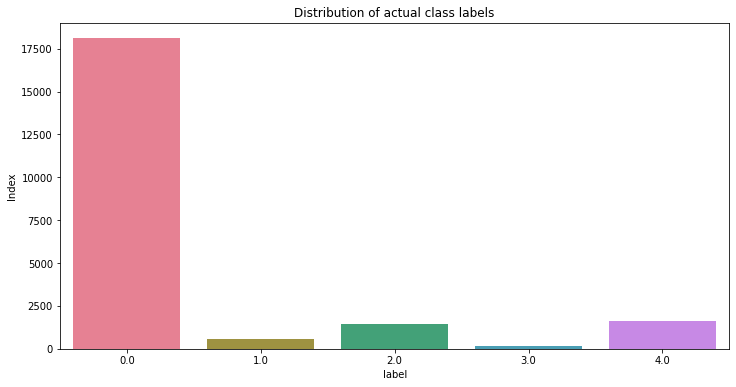

In [ ]:
#Countplot
plt.figure(figsize=(12,6))
sns.countplot(y_test, palette='husl')
plt.title('Distribution of actual class labels')
plt.xlabel('label')
plt.ylabel('Index')

### Distribution of K-Means clusters predicted in test data

In [ ]:
df_kmeans =x_test.copy()
df_kmeans['predicted_cluster'] = y_pred_cluster

In [ ]:
df_kmeans

0         1         2         3  ...  184  185  186  predicted_cluster
0      1.000000  0.758264  0.111570  0.000000  ...  0.0  0.0  0.0                  0
1      0.908425  0.783883  0.531136  0.362637  ...  0.0  0.0  0.0                  3
2      0.730088  0.212389  0.000000  0.119469  ...  0.0  0.0  0.0                  0
3      1.000000  0.910417  0.681250  0.472917  ...  0.0  0.0  0.0                  3
4      0.570470  0.399329  0.238255  0.147651  ...  0.0  0.0  0.0                  3
...         ...       ...       ...       ...  ...  ...  ...  ...                ...
21887  0.928736  0.871264  0.804598  0.742529  ...  0.0  0.0  0.0                  1
21888  0.802691  0.692078  0.587444  0.446936  ...  0.0  0.0  0.0                  1
21889  1.000000  0.967359  0.620178  0.347181  ...  0.0  0.0  0.0                  2
21890  0.984127  0.567460  0.607143  0.583333  ...  0.0  0.0  0.0                  2
21891  0.973970  0.913232  0.865510  0.823210  ...  0.0  0.0  0.0                  1

[21892 rows x 188 columns]

Text(0, 0.5, 'Index')

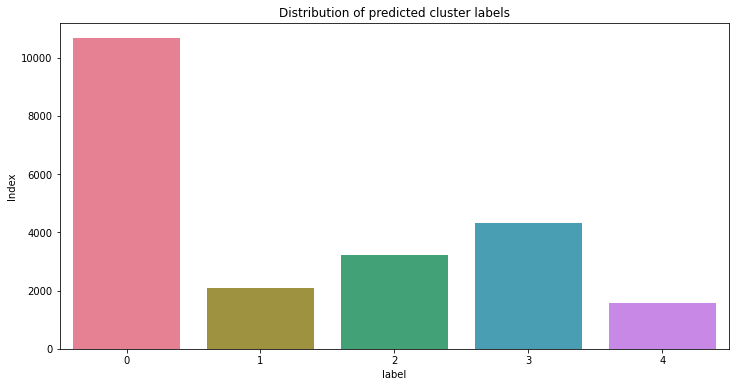

In [ ]:
#Countplot
plt.figure(figsize=(12,6))
sns.countplot(df_kmeans.predicted_cluster, palette='husl')
plt.title('Distribution of predicted cluster labels')
plt.xlabel('label')
plt.ylabel('Index')

Insights:
* Most of the observations grouped are in cluster 0.
* Cluster 2 has least number of observations.

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Define a function to plot 3D highlighting
def Axes3d_plot(df, method):
    # Initialize PCA
    pca = PCA(n_components=3)  # Reduce to k=3 dimensions
    # Fit
    df_pca = pca.fit_transform(df.drop('predicted_cluster', axis=1))

    df_pca = pd.DataFrame(df_pca, columns = ['X_component','Y_component','Z_component'])
    df_pca['predicted_cluster'] = df.predicted_cluster

    cluster_1 = df_pca[df_pca.predicted_cluster==0]
    cluster_2 = df_pca[df_pca.predicted_cluster==1]
    cluster_3 = df_pca[df_pca.predicted_cluster==2]
    cluster_4 = df_pca[df_pca.predicted_cluster==3]
    cluster_5 = df_pca[df_pca.predicted_cluster==4]

    # Plot PCA components
    fig = plt.figure(figsize = (12, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title(f'PCA analysis - {method}')
    ax.set_xlabel("X component")
    ax.set_ylabel("Y component")
    ax.set_zlabel("Z component")
    # Plot cluster 1
    ax.scatter(cluster_1['X_component'], cluster_1['Y_component'], zs=cluster_1['Z_component'], s=4, lw=2, label="0", c="green")
    ax.scatter(cluster_2['X_component'], cluster_2['Y_component'], zs=cluster_2['Z_component'], s=4, lw=2, label="1", c="cyan")
    ax.scatter(cluster_3['X_component'], cluster_3['Y_component'], zs=cluster_3['Z_component'], s=4, lw=2, label="2", c="yellow")
    ax.scatter(cluster_4['X_component'], cluster_4['Y_component'], zs=cluster_4['Z_component'], s=4, lw=2, label="3", c="orange")
    ax.scatter(cluster_5['X_component'], cluster_5['Y_component'], zs=cluster_5['Z_component'], s=4, lw=2, label="4", c="m")

    ax.legend()
    plt.show()

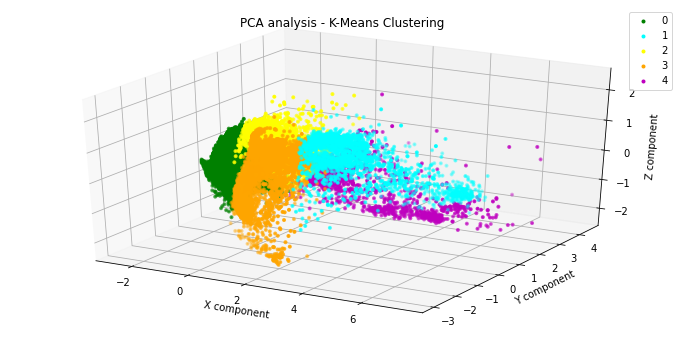

In [ ]:
# Plot 3D for K-Means
Axes3d_plot(df_kmeans, 'K-Means Clustering')

It seems some observations are clustered wrongly.

In [ ]:
# Add actual labels
df_kmeans['Actual_labels'] = y_test.astype('uint8')
df_kmeans['Actual_label_names'] = y_test_labels

In [ ]:
# Create a dataframe for each cluster
df1_kmeans = df_kmeans[df_kmeans['predicted_cluster']==0].reset_index(drop=True)
df2_kmeans = df_kmeans[df_kmeans['predicted_cluster']==1].reset_index(drop=True)
df3_kmeans = df_kmeans[df_kmeans['predicted_cluster']==2].reset_index(drop=True)
df4_kmeans = df_kmeans[df_kmeans['predicted_cluster']==3].reset_index(drop=True)
df5_kmeans = df_kmeans[df_kmeans['predicted_cluster']==4].reset_index(drop=True)

In [ ]:
df1_kmeans.head()

0         1  ...  Actual_labels  Actual_label_names
0  1.000000  0.758264  ...              0                   N
1  0.730088  0.212389  ...              0                   N
2  1.000000  0.923664  ...              0                   N
3  1.000000  0.797260  ...              0                   N
4  0.997429  0.861183  ...              0                   N

[5 rows x 190 columns]

In [ ]:
df2_kmeans.head()

0         1  ...  Actual_labels  Actual_label_names
0  0.909408  0.975610  ...              0                   N
1  0.969697  1.000000  ...              0                   N
2  0.165680  0.556213  ...              0                   N
3  1.000000  0.930599  ...              0                   N
4  0.922780  0.882239  ...              0                   N

[5 rows x 190 columns]

In [ ]:
df3_kmeans.head()

0         1  ...  Actual_labels  Actual_label_names
0  0.927803  0.866359  ...              0                   N
1  0.991903  0.785425  ...              0                   N
2  0.928105  0.846405  ...              0                   N
3  0.967153  0.843066  ...              0                   N
4  0.924266  0.782071  ...              0                   N

[5 rows x 190 columns]

In [ ]:
df4_kmeans.head()

0         1  ...  Actual_labels  Actual_label_names
0  0.908425  0.783883  ...              0                   N
1  1.000000  0.910417  ...              0                   N
2  0.570470  0.399329  ...              0                   N
3  1.000000  0.914230  ...              0                   N
4  1.000000  0.746835  ...              0                   N

[5 rows x 190 columns]

In [ ]:
df5_kmeans.head()

0         1  ...  Actual_labels  Actual_label_names
0  0.991870  0.876423  ...              0                   N
1  1.000000  0.892473  ...              0                   N
2  0.941363  0.873217  ...              0                   N
3  0.978723  0.512766  ...              0                   N
4  1.000000  0.521154  ...              0                   N

[5 rows x 190 columns]

In [ ]:
kmeans_df = df_kmeans.set_index("predicted_cluster Actual_label_names".split()).sort_index()
kmeans_df

0         1  ...  186  Actual_labels
predicted_cluster Actual_label_names                      ...                    
0                 F                   0.868114  1.000000  ...  0.0              3
                  F                   1.000000  0.768025  ...  0.0              3
                  F                   1.000000  0.986641  ...  0.0              3
                  F                   0.840909  0.926136  ...  0.0              3
                  F                   1.000000  0.971429  ...  0.0              3
...                                        ...       ...  ...  ...            ...
4                 V                   0.798867  0.787535  ...  0.0              2
                  V                   0.000000  0.070896  ...  0.0              2
                  V                   0.925987  0.876645  ...  0.0              2
                  V                   0.261044  0.248996  ...  0.0              2
                  V                   0.672249  0.650718  ...  0.0              2

[21892 rows x 188 columns]

In [ ]:
# Actual_labels
kmeans_df = kmeans_df.drop('Actual_labels', axis=1)

In [ ]:
kmeans_df

0         1    ...  185  186
predicted_cluster Actual_label_names                      ...          
0                 F                   0.868114  1.000000  ...  0.0  0.0
                  F                   1.000000  0.768025  ...  0.0  0.0
                  F                   1.000000  0.986641  ...  0.0  0.0
                  F                   0.840909  0.926136  ...  0.0  0.0
                  F                   1.000000  0.971429  ...  0.0  0.0
...                                        ...       ...  ...  ...  ...
4                 V                   0.798867  0.787535  ...  0.0  0.0
                  V                   0.000000  0.070896  ...  0.0  0.0
                  V                   0.925987  0.876645  ...  0.0  0.0
                  V                   0.261044  0.248996  ...  0.0  0.0
                  V                   0.672249  0.650718  ...  0.0  0.0

[21892 rows x 187 columns]

### How heart signals distributed in each cluster?

### Cluster 1

In [ ]:
# Apply PCA
pca = PCA(n_components=2, random_state=42)
df_pca1  = pca.fit_transform(df1_kmeans.drop(['predicted_cluster', 'Actual_label_names', 'Actual_labels'], axis=1))
# Create a dataframe for df_pca1
df_pca1 = pd.DataFrame(df_pca1, columns = ['X_component', 'Y_component'])
df_pca1['predicted_cluster'] = df1_kmeans.predicted_cluster
df_pca1['Actual_labels'] = df1_kmeans.Actual_labels

Text(0, 0.5, 'Index')

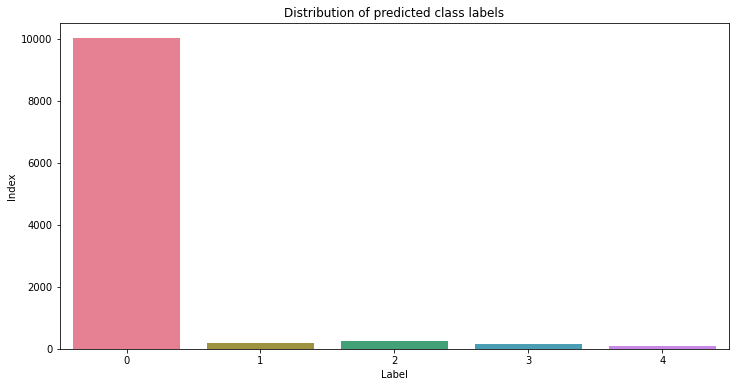

In [ ]:
#Countplot
plt.figure(figsize=(12,6))
sns.countplot(df1_kmeans.Actual_labels, palette='husl')
plt.title('Distribution of predicted class labels')
plt.xlabel('Label')
plt.ylabel('Index')

Text(0, 0.5, 'Y_component')

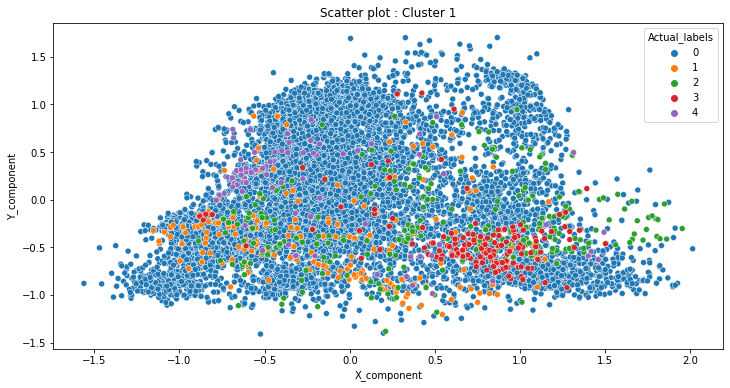

In [ ]:
# Scatter plot
plt.figure(figsize=(12,6))
sns.scatterplot(df_pca1['X_component'], df_pca1['Y_component'], hue = df_pca1['Actual_labels'], palette='tab10')
plt.title('Scatter plot : Cluster 1')
plt.xlabel('X_component')
plt.ylabel('Y_component')

Insights:
* Cluster 1 contains most of the observations belonging to the class 0.

### Cluster 2

In [ ]:
df_pca2  = pca.fit_transform(df2_kmeans.drop(['predicted_cluster', 'Actual_labels', 'Actual_label_names'], axis=1))
# Create a dataframe for df_pca2
df_pca2 = pd.DataFrame(df_pca2, columns = ['X_component', 'Y_component'])
df_pca2['predicted_cluster'] = df2_kmeans.predicted_cluster
df_pca2['Actual_labels'] = df2_kmeans.Actual_labels

Text(0, 0.5, 'Index')

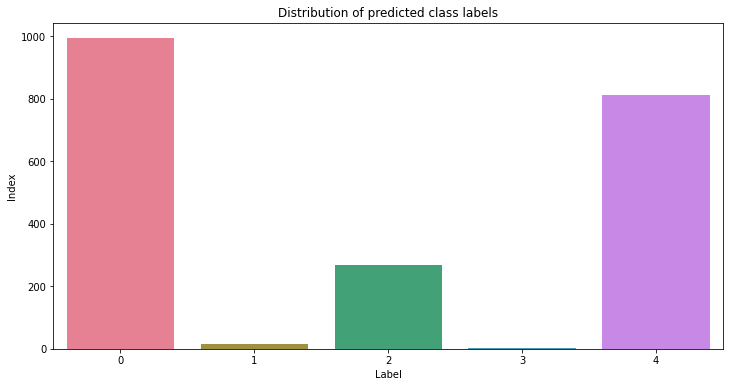

In [ ]:
#Countplot
plt.figure(figsize=(12,6))
sns.countplot(df2_kmeans.Actual_labels, palette='husl')
plt.title('Distribution of predicted class labels')
plt.xlabel('Label')
plt.ylabel('Index')

Text(0, 0.5, 'Y_component')

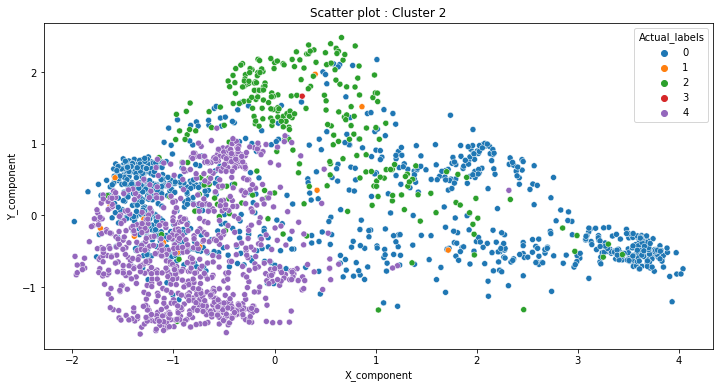

In [ ]:
# Scatter plot
plt.figure(figsize=(12,6))
sns.scatterplot(df_pca2['X_component'], df_pca2['Y_component'], hue = df_pca2['Actual_labels'], palette='tab10')
plt.title('Scatter plot : Cluster 2')
plt.xlabel('X_component')
plt.ylabel('Y_component')

Insights:
* Cluster 2 contains most of the observations belonging to the class 0, & 4.

### Cluster 3

In [ ]:
df_pca3  = pca.fit_transform(df3_kmeans.drop(['predicted_cluster', 'Actual_labels', 'Actual_label_names'], axis=1))
# Create a dataframe for df_pca3
df_pca3 = pd.DataFrame(df_pca3, columns = ['X_component', 'Y_component'])
df_pca3['predicted_cluster'] = df3_kmeans.predicted_cluster
df_pca3['Actual_labels'] = df3_kmeans.Actual_labels

Text(0, 0.5, 'Index')

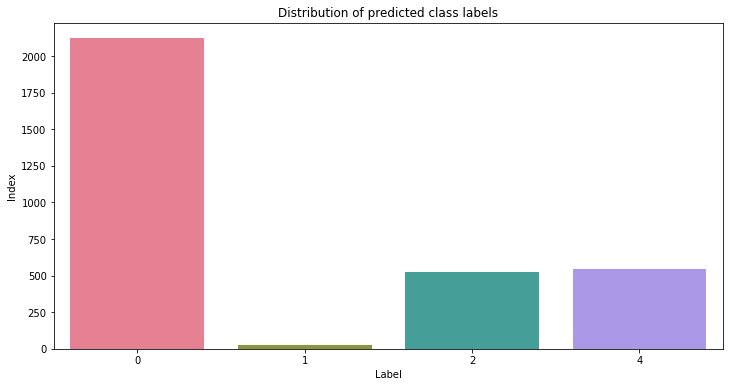

In [ ]:
#Countplot
plt.figure(figsize=(12,6))
sns.countplot(df3_kmeans.Actual_labels, palette='husl')
plt.title('Distribution of predicted class labels')
plt.xlabel('Label')
plt.ylabel('Index')

Text(0, 0.5, 'Y_component')

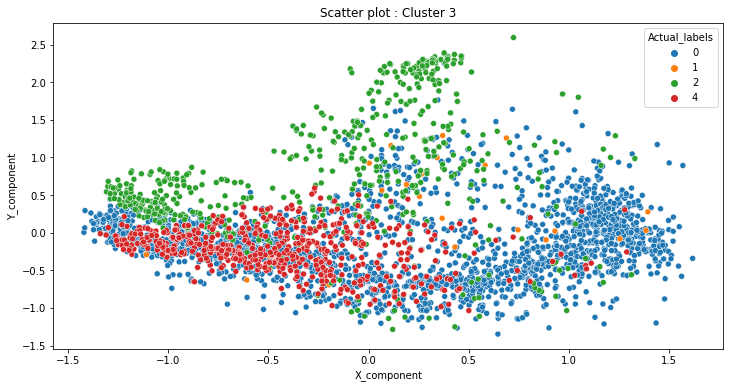

In [ ]:
# Scatter plot
plt.figure(figsize=(12,6))
sns.scatterplot(df_pca3['X_component'], df_pca3['Y_component'], hue = df_pca3['Actual_labels'], palette='tab10')
plt.title('Scatter plot : Cluster 3')
plt.xlabel('X_component')
plt.ylabel('Y_component')

Insights:
* Cluster 3 contains most of the observations belonging to the class 0, & 2.

### Cluster 4

In [ ]:
df_pca4  = pca.fit_transform(df4_kmeans.drop(['predicted_cluster', 'Actual_labels', 'Actual_label_names'], axis=1))
# Create a dataframe for df_pca4
df_pca4 = pd.DataFrame(df_pca4, columns = ['X_component', 'Y_component'])
df_pca4['predicted_cluster'] = df4_kmeans.predicted_cluster
df_pca4['Actual_labels'] = df4_kmeans.Actual_labels

Text(0, 0.5, 'Index')

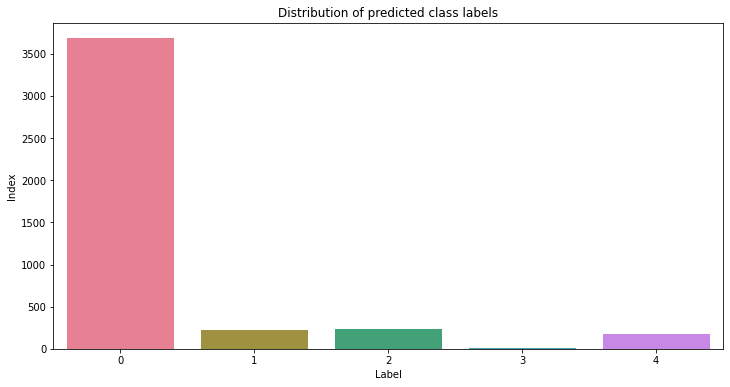

In [ ]:
#Countplot
plt.figure(figsize=(12,6))
sns.countplot(df4_kmeans.Actual_labels, palette='husl')
plt.title('Distribution of predicted class labels')
plt.xlabel('Label')
plt.ylabel('Index')

Text(0, 0.5, 'Y_component')

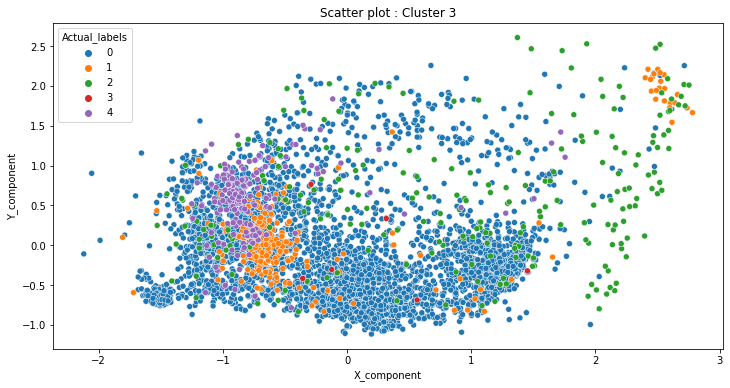

In [ ]:
# Scatter plot
plt.figure(figsize=(12,6))
sns.scatterplot(df_pca4['X_component'], df_pca4['Y_component'], hue = df_pca4['Actual_labels'], palette='tab10')
plt.title('Scatter plot : Cluster 3')
plt.xlabel('X_component')
plt.ylabel('Y_component')

Insights:
* Cluster 4 contains most of the observations belonging to the class 0.

### Cluster 5

In [ ]:
df_pca5  = pca.fit_transform(df5_kmeans.drop(['predicted_cluster', 'Actual_labels', 'Actual_label_names'], axis=1))
# Create a dataframe for df_pca5
df_pca5 = pd.DataFrame(df_pca5, columns = ['X_component', 'Y_component'])
df_pca5['predicted_cluster'] = df5_kmeans.predicted_cluster
df_pca5['Actual_labels'] = df5_kmeans.Actual_labels

Text(0, 0.5, 'Index')

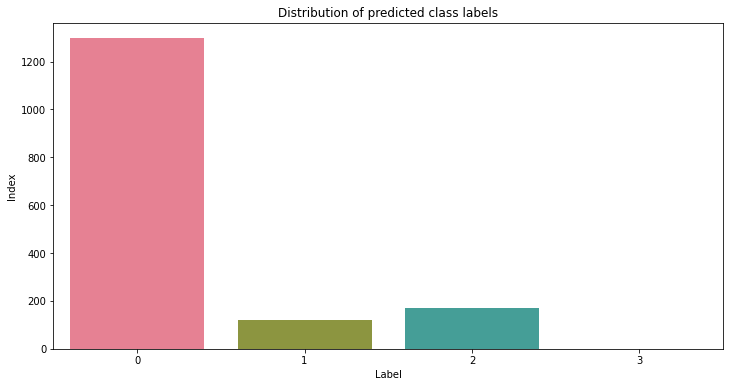

In [ ]:
#Countplot
plt.figure(figsize=(12,6))
sns.countplot(df5_kmeans.Actual_labels, palette='husl')
plt.title('Distribution of predicted class labels')
plt.xlabel('Label')
plt.ylabel('Index')

Text(0, 0.5, 'Y_component')

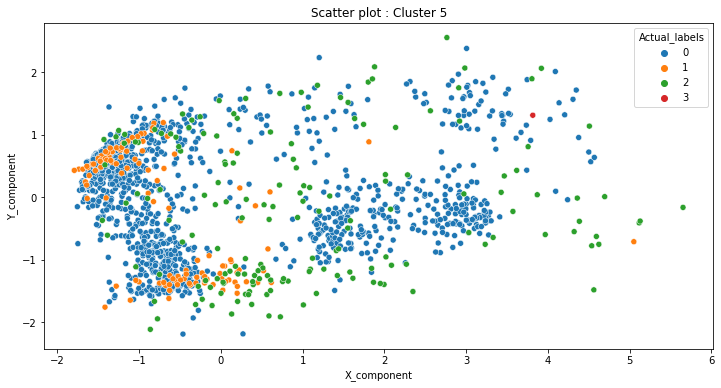

In [ ]:
# Scatter plot
plt.figure(figsize=(12,6))
sns.scatterplot(df_pca5['X_component'], df_pca5['Y_component'], hue = df_pca5['Actual_labels'], palette='tab10')
plt.title('Scatter plot : Cluster 5')
plt.xlabel('X_component')
plt.ylabel('Y_component')

Insights:
* Cluster 5 contains most of the observations belonging to the class 0 followed by 2.

### Let's analyze 100 random observations from each cluster to understand the patterns in it.

In [ ]:
import random

In [ ]:
# Function to plot clusters
def plot_100samples(label,df , bbox, ncol):
    fig=df.loc[label].T.iloc[:, random.sample(range(df.loc[label].shape[0]), 100)].plot(figsize = (12,6),\
                                       title=f'Number of observations in cluster {label+1} : {len(df.loc[label])}')\
    .legend(title='Actual class names', bbox_to_anchor=bbox, ncol=ncol)
    return print(fig)

Legend
Legend
Legend
Legend
Legend


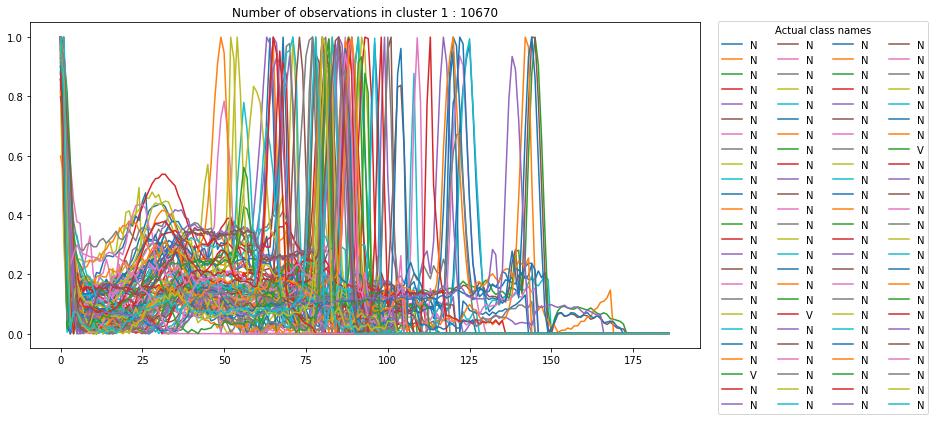

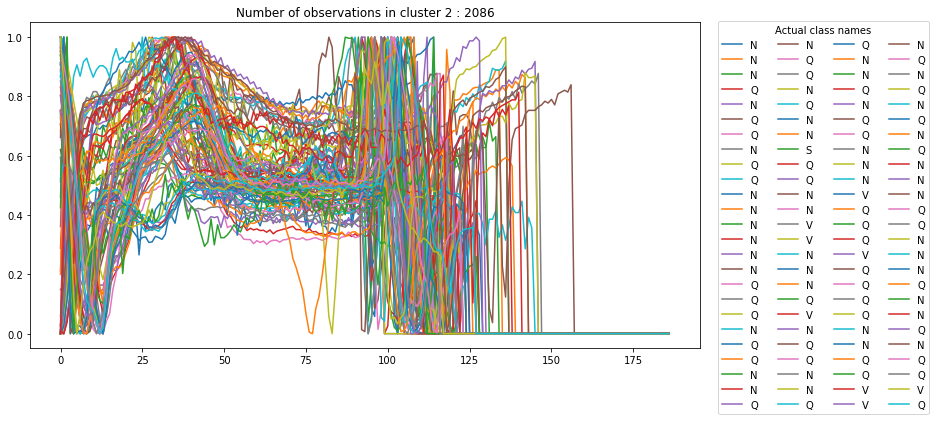

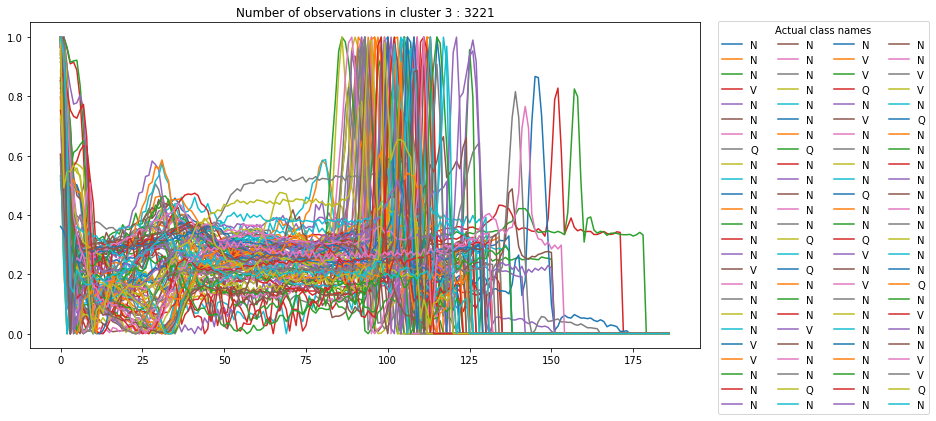

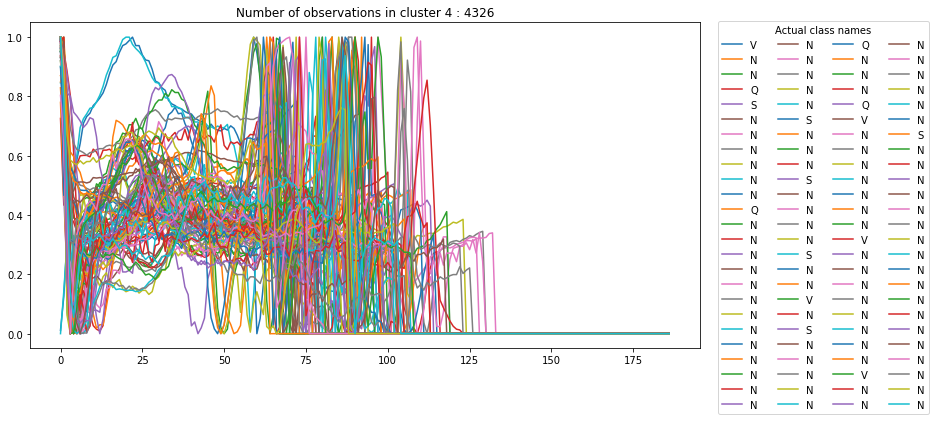

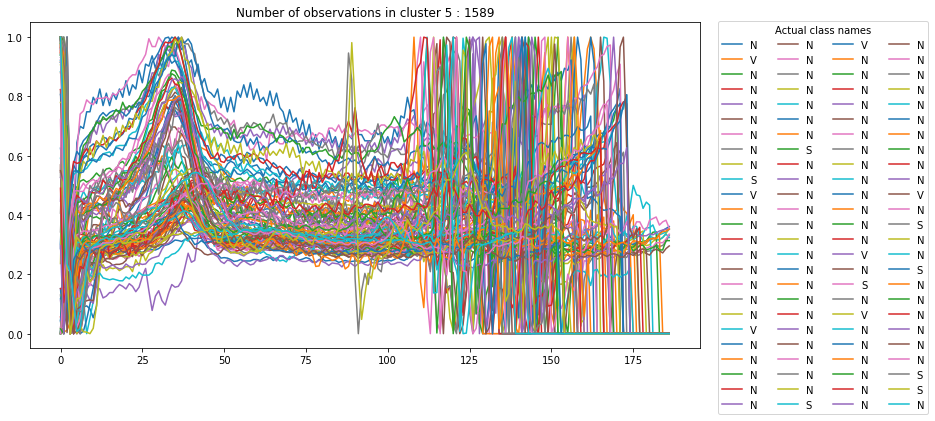

In [ ]:
#Plot for Cluster 1
plot_100samples(0, kmeans_df, (1.02, 1.02), 4)
#Plot for Cluster 2
plot_100samples(1,kmeans_df, (1.02, 1.02), 4)
#Plot for Cluster 3
plot_100samples(2, kmeans_df, (1.02, 1.02), 4)
#Plot for Cluster 4
plot_100samples(3, kmeans_df, (1.02, 1.02), 4)
#Plot for Cluster 5
plot_100samples(4, kmeans_df, (1.02, 1.02), 4)

### Evaluate K-means model

We are using Fowlkes-Mallows index (FMI)/score for evaluating K-means & GMM models.

It measure the similarity of two clusterings of a set of points. The Fowlkes-Mallows index (FMI) is defined as the geometric mean between of the precision and recall:       
FMI = TP / sqrt((TP + FP) * (TP + FN))

Where TP is the number of True Positive (i.e. the number of pair of points that belongs in the same clusters in both labels_true and labels_pred), FP is the number of False Positive (i.e. the number of pair of points that belongs in the same clusters in labels_true and not in labels_pred) and FN is the number of False Negative (i.e the number of pair of points that belongs in the same clusters in labels_pred and not in labels_True).

In [ ]:
# Evaluate K-means model
from sklearn.metrics.cluster import fowlkes_mallows_score

In [ ]:
fow_ma_score = fowlkes_mallows_score(y_test, df_kmeans['predicted_cluster'])
fow_ma_score

0.549265473295667

## Gaussian Mixture model

In [ ]:
# training gaussian mixture model
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5, covariance_type = 'spherical', random_state=42)
gmm.fit(x_train)

GaussianMixture(covariance_type='spherical', init_params='kmeans', max_iter=100,
                means_init=None, n_components=5, n_init=1, precisions_init=None,
                random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

### Predict clusters on test data

In [ ]:
y_pred_clust = gmm.predict(x_test.values)

In [ ]:
# Evalauate GMM model
fow_ma_score = fowlkes_mallows_score(y_test, y_pred_clust)
fow_ma_score

0.547157443360513

Text(0, 0.5, 'Index')

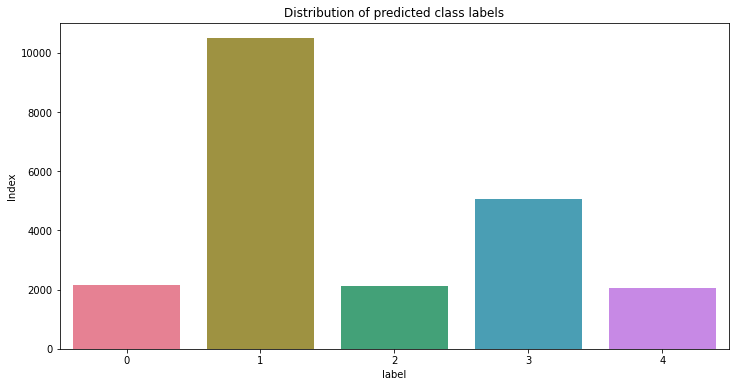

In [ ]:
#Countplot
plt.figure(figsize=(12,6))
sns.countplot(y_pred_clust, palette='husl')
plt.title('Distribution of predicted class labels')
plt.xlabel('label')
plt.ylabel('Index')

Insights:
* We found most of the observations grouped together in cluster 4.
* Cluster 0 has least number of observations.

In [ ]:
gmm_model = x_test.copy()
gmm_model['predicted_cluster'] = y_pred_clust

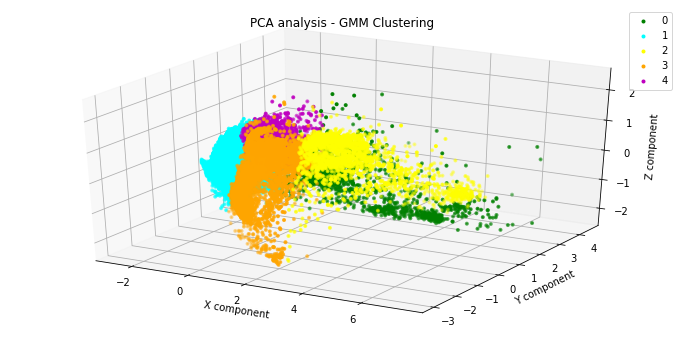

In [ ]:
# Plot 3D for Gaussin Mixture model
Axes3d_plot(gmm_model, 'GMM Clustering')

In [ ]:
# Add labels
gmm_model['Actual_labels'] = y_test.astype('uint8')
gmm_model['Actual_label_names'] = y_test_labels

### GMM Clustering analysis

In [ ]:
# Create a dataframe for each cluster
df1_gmm = gmm_model[gmm_model['predicted_cluster']==0].reset_index(drop=True)
df2_gmm = gmm_model[gmm_model['predicted_cluster']==1].reset_index(drop=True)
df3_gmm = gmm_model[gmm_model['predicted_cluster']==2].reset_index(drop=True)
df4_gmm = gmm_model[gmm_model['predicted_cluster']==3].reset_index(drop=True)
df5_gmm = gmm_model[gmm_model['predicted_cluster']==4].reset_index(drop=True)

In [ ]:
df1_gmm.head()

0         1  ...  Actual_labels  Actual_label_names
0  0.991870  0.876423  ...              0                   N
1  1.000000  0.892473  ...              0                   N
2  0.941363  0.873217  ...              0                   N
3  0.978723  0.512766  ...              0                   N
4  0.967153  0.843066  ...              0                   N

[5 rows x 190 columns]

In [ ]:
df2_gmm.head()

0         1  ...  Actual_labels  Actual_label_names
0  1.000000  0.758264  ...              0                   N
1  0.730088  0.212389  ...              0                   N
2  1.000000  0.923664  ...              0                   N
3  1.000000  0.797260  ...              0                   N
4  0.997429  0.861183  ...              0                   N

[5 rows x 190 columns]

In [ ]:
df3_gmm.head()

0         1  ...  Actual_labels  Actual_label_names
0  0.909408  0.975610  ...              0                   N
1  0.969697  1.000000  ...              0                   N
2  0.165680  0.556213  ...              0                   N
3  1.000000  0.930599  ...              0                   N
4  0.922780  0.882239  ...              0                   N

[5 rows x 190 columns]

In [ ]:
df4_gmm.head()

0         1  ...  Actual_labels  Actual_label_names
0  0.908425  0.783883  ...              0                   N
1  1.000000  0.910417  ...              0                   N
2  0.570470  0.399329  ...              0                   N
3  1.000000  0.914230  ...              0                   N
4  1.000000  0.746835  ...              0                   N

[5 rows x 190 columns]

In [ ]:
df5_gmm.head()

0         1  ...  Actual_labels  Actual_label_names
0  0.927803  0.866359  ...              0                   N
1  0.928105  0.846405  ...              0                   N
2  0.924266  0.782071  ...              0                   N
3  0.943850  0.897059  ...              0                   N
4  0.956399  0.859353  ...              0                   N

[5 rows x 190 columns]

### Cluster 1

In [ ]:
gmm_pca1  = pca.fit_transform(df1_gmm.drop(['predicted_cluster', 'Actual_labels', 'Actual_label_names'], axis=1))
# Create a dataframe for df_pca1
gmm_pca1 = pd.DataFrame(gmm_pca1, columns = ['X_component', 'Y_component'])
gmm_pca1['predicted_cluster'] = df1_gmm.predicted_cluster
gmm_pca1['Actual_labels'] = df1_gmm.Actual_labels

Text(0, 0.5, 'Index')

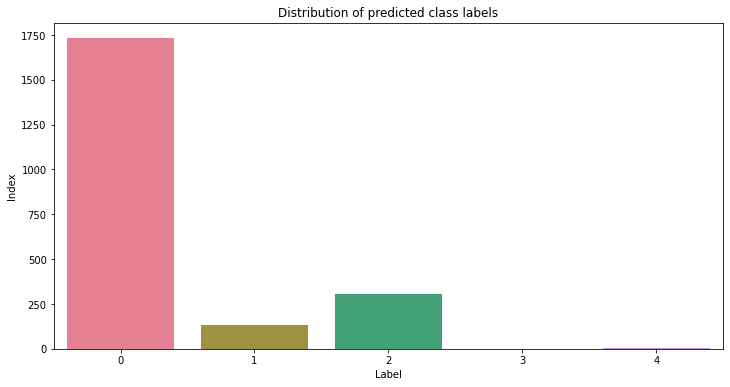

In [ ]:
#Countplot
plt.figure(figsize=(12,6))
sns.countplot(gmm_pca1.Actual_labels, palette='husl')
plt.title('Distribution of predicted class labels')
plt.xlabel('Label')
plt.ylabel('Index')

Text(0, 0.5, 'Y_component')

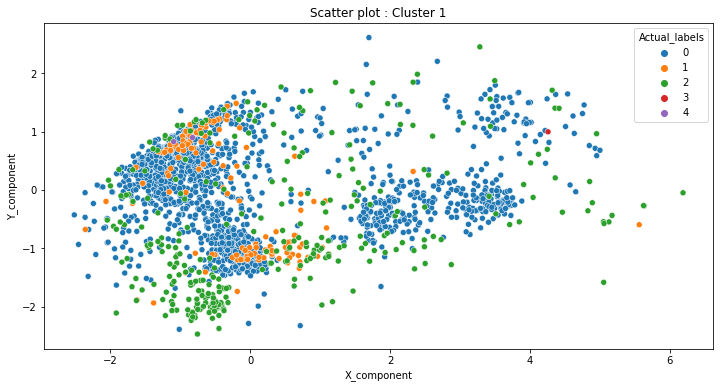

In [ ]:
# Scatter plot
plt.figure(figsize=(12,6))
sns.scatterplot(gmm_pca1['X_component'], gmm_pca1['Y_component'], hue = gmm_pca1['Actual_labels'], palette='tab10')
plt.title('Scatter plot : Cluster 1')
plt.xlabel('X_component')
plt.ylabel('Y_component')

Insights:
* Cluster 1 contains most of the observations belonging to the class 0.

### Cluster 2

In [ ]:
gmm_pca2  = pca.fit_transform(df2_kmeans.drop(['predicted_cluster', 'Actual_labels', 'Actual_label_names'], axis=1))
# Create a dataframe for df_pca2
gmm_pca2 = pd.DataFrame(gmm_pca2, columns = ['X_component', 'Y_component'])
gmm_pca2['predicted_cluster'] = df2_gmm.predicted_cluster
gmm_pca2['Actual_labels'] = df2_gmm.Actual_labels

Text(0, 0.5, 'Index')

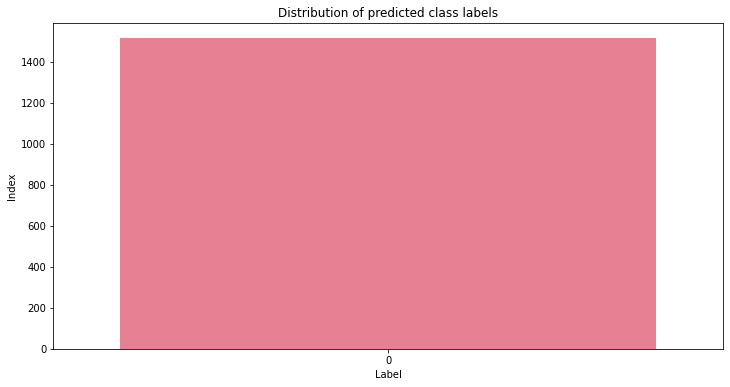

In [ ]:
#Countplot
plt.figure(figsize=(12,6))
sns.countplot(gmm_pca2.Actual_labels, palette='husl')
plt.title('Distribution of predicted class labels')
plt.xlabel('Label')
plt.ylabel('Index')

Text(0, 0.5, 'Y_component')

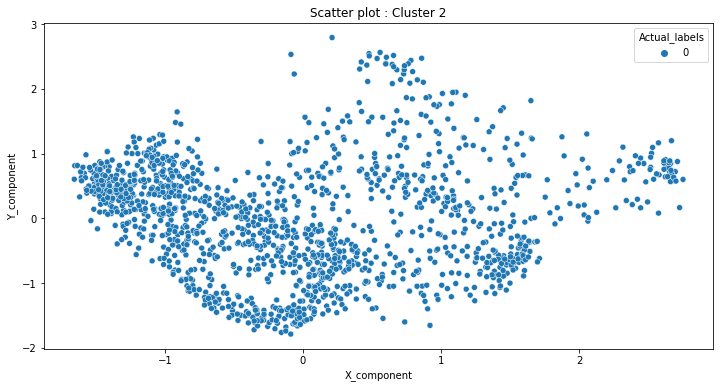

In [ ]:
# Scatter plot
plt.figure(figsize=(12,6))
sns.scatterplot(gmm_pca2['X_component'], gmm_pca2['Y_component'], hue = gmm_pca2['Actual_labels'], palette='tab10')
plt.title('Scatter plot : Cluster 2')
plt.xlabel('X_component')
plt.ylabel('Y_component')

Insights:
* All of the observations from class 0 in cluster 2.

### Cluster 3

In [ ]:
gmm_pca3  = pca.fit_transform(df3_gmm.drop(['predicted_cluster', 'Actual_labels', 'Actual_label_names' ], axis=1))
# Create a dataframe for df_pca3
gmm_pca3 = pd.DataFrame(gmm_pca3, columns = ['X_component', 'Y_component'])
gmm_pca3['predicted_cluster'] = df3_gmm.predicted_cluster
gmm_pca3['Actual_labels'] = df3_gmm.Actual_labels

Text(0, 0.5, 'Index')

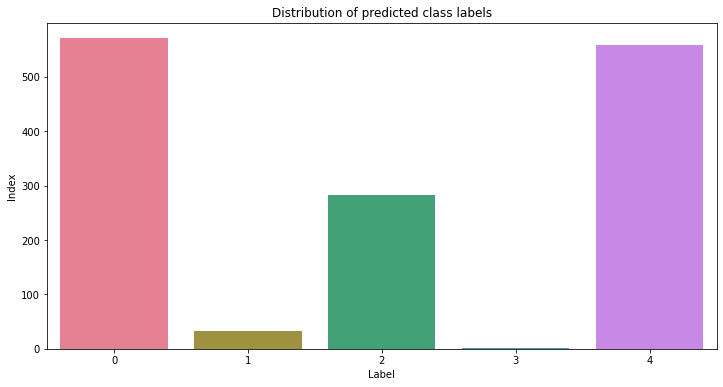

In [ ]:
#Countplot
plt.figure(figsize=(12,6))
sns.countplot(gmm_pca3.Actual_labels, palette='husl')
plt.title('Distribution of predicted class labels')
plt.xlabel('Label')
plt.ylabel('Index')

Text(0, 0.5, 'Y_component')

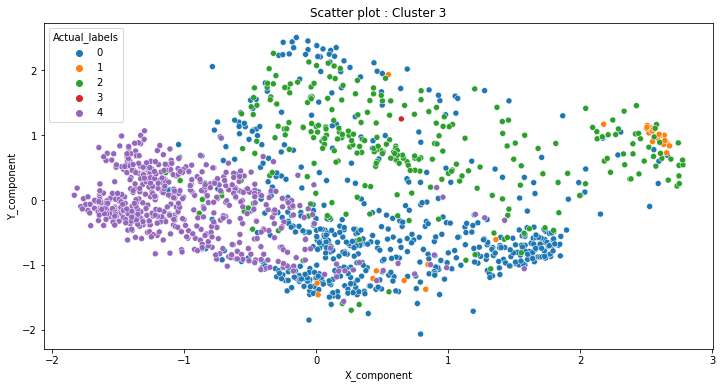

In [ ]:
# Scatter plot
plt.figure(figsize=(12,6))
sns.scatterplot(gmm_pca3['X_component'], gmm_pca3['Y_component'], hue = gmm_pca3['Actual_labels'], palette='tab10')
plt.title('Scatter plot : Cluster 3')
plt.xlabel('X_component')
plt.ylabel('Y_component')

Insights:
* Most of the observations are from class 0 & 4 in cluster 3.

### Cluster 4

In [ ]:
gmm_pca4  = pca.fit_transform(df4_gmm.drop(['predicted_cluster', 'Actual_labels', 'Actual_label_names'], axis=1))
# Create a dataframe for df_pca4
gmm_pca4 = pd.DataFrame(gmm_pca4, columns = ['X_component', 'Y_component'])
gmm_pca4['predicted_cluster'] = df4_gmm.predicted_cluster
gmm_pca4['Actual_labels'] = df4_gmm.Actual_labels

Text(0, 0.5, 'Index')

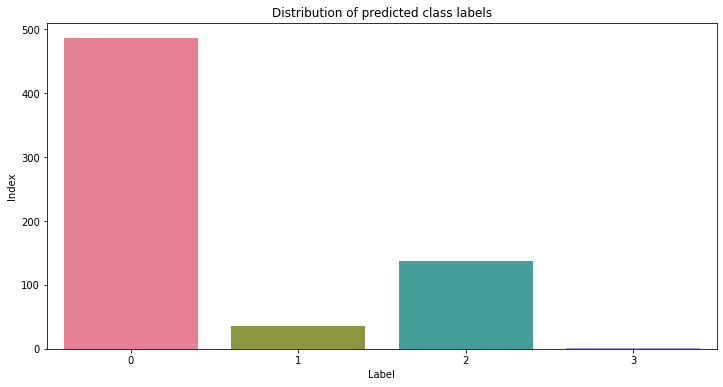

In [ ]:
#Countplot
plt.figure(figsize=(12,6))
sns.countplot(gmm_pca4.Actual_labels, palette='husl')
plt.title('Distribution of predicted class labels')
plt.xlabel('Label')
plt.ylabel('Index')

Text(0, 0.5, 'Y_component')

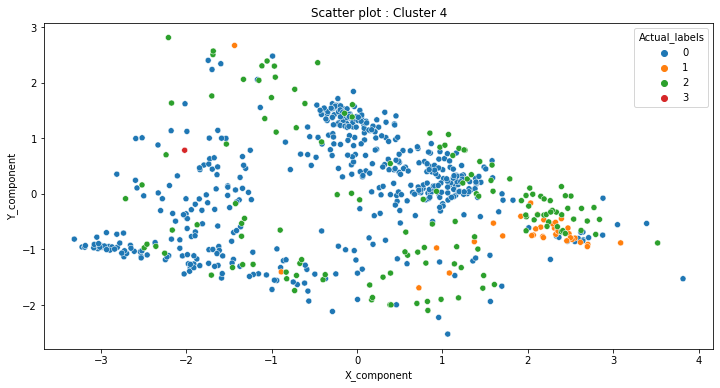

In [ ]:
# Scatter plot
plt.figure(figsize=(12,6))
sns.scatterplot(gmm_pca4['X_component'], gmm_pca4['Y_component'], hue = gmm_pca4['Actual_labels'], palette='tab10')
plt.title('Scatter plot : Cluster 4')
plt.xlabel('X_component')
plt.ylabel('Y_component')

Insights:
* Cluster 4 contains most number of observations from class 0 & 2.

### Cluster 5

In [ ]:
gmm_pca5  = pca.fit_transform(df5_gmm.drop(['predicted_cluster', 'Actual_labels', 'Actual_label_names'], axis=1))
# Create a dataframe for df_pca5
gmm_pca5 = pd.DataFrame(gmm_pca5, columns = ['X_component', 'Y_component'])
gmm_pca5['predicted_cluster'] = df5_gmm.predicted_cluster
gmm_pca5['Actual_labels'] = df5_gmm.Actual_labels

Text(0, 0.5, 'Index')

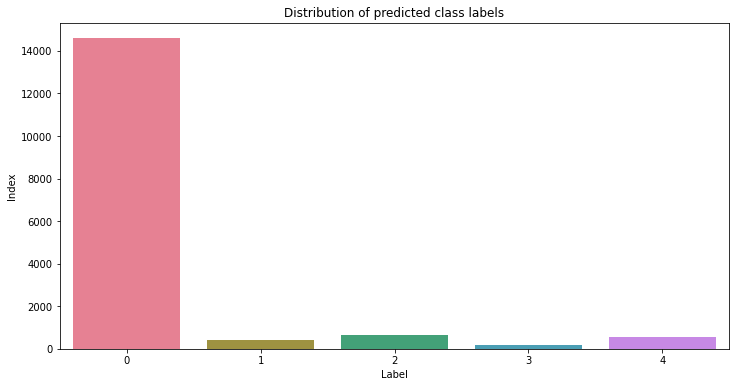

In [ ]:
#Countplot
plt.figure(figsize=(12,6))
sns.countplot(gmm_pca5.Actual_labels, palette='husl')
plt.title('Distribution of predicted class labels')
plt.xlabel('Label')
plt.ylabel('Index')

Text(0, 0.5, 'Y_component')

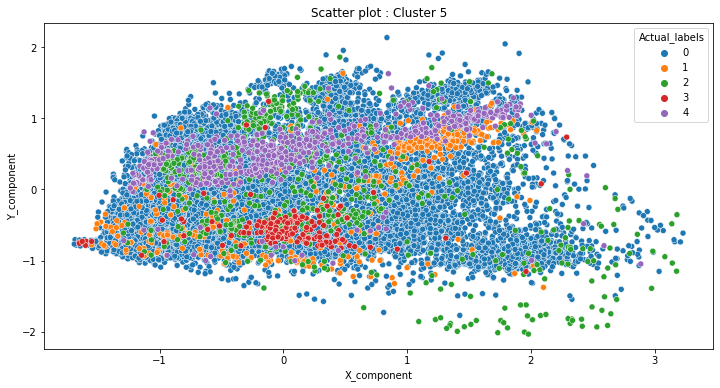

In [ ]:
# Scatter plot
plt.figure(figsize=(12,6))
sns.scatterplot(gmm_pca5['X_component'], gmm_pca5['Y_component'], hue = gmm_pca5['Actual_labels'], palette='tab10')
plt.title('Scatter plot : Cluster 5')
plt.xlabel('X_component')
plt.ylabel('Y_component')

Insights:
* Most of the observations are from class 0 in cluster 5.

### Let's analyze 100 random observations from each cluster to understand the patterns in it.

In [ ]:
gmm_df = gmm_model.set_index("predicted_cluster Actual_label_names".split()).sort_index()
gmm_df

0         1         2         3  \
predicted_cluster Actual_label_names                                           
0                 N                   0.012539  0.141066  0.282132  0.435737   
                  N                   0.100295  0.203540  0.315634  0.451327   
                  N                   0.022346  0.120112  0.270950  0.391061   
                  N                   0.000000  0.160377  0.268868  0.372642   
                  N                   0.087227  0.199377  0.342679  0.467290   
...                                        ...       ...       ...       ...   
4                 V                   0.000000  0.020408  0.081633  0.163265   
                  V                   1.000000  0.945755  0.758255  0.496462   
                  V                   1.000000  0.959544  0.628631  0.230290   
                  V                   1.000000  0.955272  0.649627  0.240682   
                  V                   1.000000  0.932136  0.648703  0.263473   

                                             4         5         6         7  \
predicted_cluster Actual_label_names                                           
0                 N                   0.514107  0.611285  0.730408  0.789969   
                  N                   0.530973  0.601770  0.702065  0.778761   
                  N                   0.491620  0.583799  0.720670  0.759777   
                  N                   0.448113  0.466981  0.443396  0.509434   
                  N                   0.538941  0.651090  0.728972  0.772586   
...                                        ...       ...       ...       ...   
4                 V                   0.250000  0.323980  0.349490  0.364796   
                  V                   0.314858  0.168632  0.127358  0.125000   
                  V                   0.169087  0.172199  0.127593  0.107884   
                  V                   0.183174  0.175719  0.117146  0.107561   
                  V                   0.137725  0.111776  0.095808  0.045908   

                                             8         9  ...  178  179  180  \
predicted_cluster Actual_label_names                      ...                  
0                 N                   0.786834  0.805643  ...  0.0  0.0  0.0   
                  N                   0.784661  0.796460  ...  0.0  0.0  0.0   
                  N                   0.787709  0.773743  ...  0.0  0.0  0.0   
                  N                   0.495283  0.443396  ...  0.0  0.0  0.0   
                  N                   0.763240  0.772586  ...  0.0  0.0  0.0   
...                                        ...       ...  ...  ...  ...  ...   
4                 V                   0.392857  0.451531  ...  0.0  0.0  0.0   
                  V                   0.101415  0.086085  ...  0.0  0.0  0.0   
                  V                   0.117220  0.118257  ...  0.0  0.0  0.0   
                  V                   0.110756  0.109691  ...  0.0  0.0  0.0   
                  V                   0.049900  0.135729  ...  0.0  0.0  0.0   

                                      181  182  183  184  185  186  \
predicted_cluster Actual_label_names                                 
0                 N                   0.0  0.0  0.0  0.0  0.0  0.0   
                  N                   0.0  0.0  0.0  0.0  0.0  0.0   
                  N                   0.0  0.0  0.0  0.0  0.0  0.0   
                  N                   0.0  0.0  0.0  0.0  0.0  0.0   
                  N                   0.0  0.0  0.0  0.0  0.0  0.0   
...                                   ...  ...  ...  ...  ...  ...   
4                 V                   0.0  0.0  0.0  0.0  0.0  0.0   
                  V                   0.0  0.0  0.0  0.0  0.0  0.0   
                  V                   0.0  0.0  0.0  0.0  0.0  0.0   
                  V                   0.0  0.0  0.0  0.0  0.0  0.0   
                  V                   0.0  0.0  0.0  0.0  0.0  0.0   

           

In [ ]:
gmm_df = gmm_df.drop('Actual_labels', axis=1)

Legend
Legend
Legend
Legend
Legend


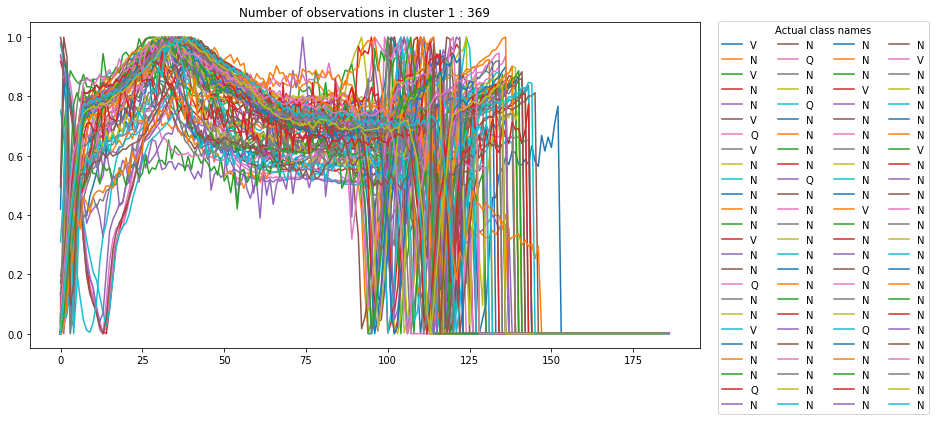

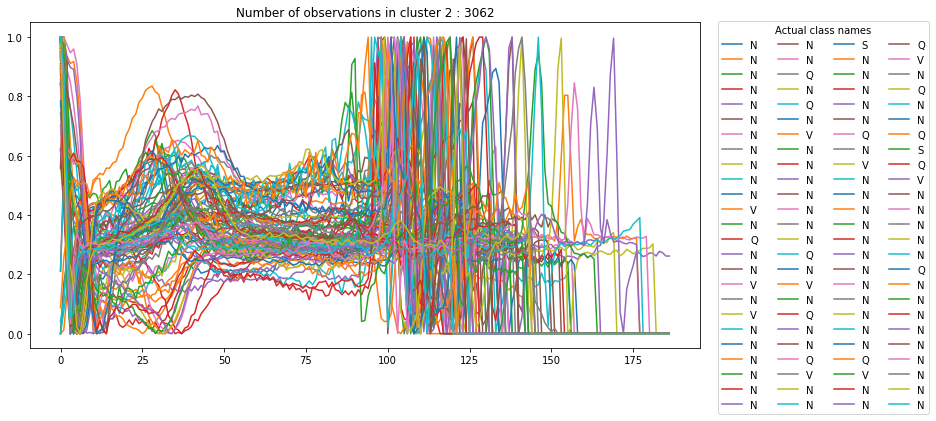

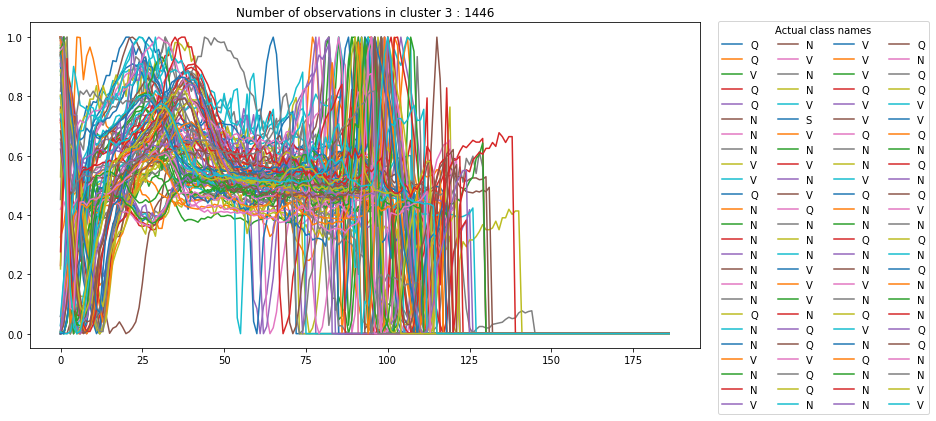

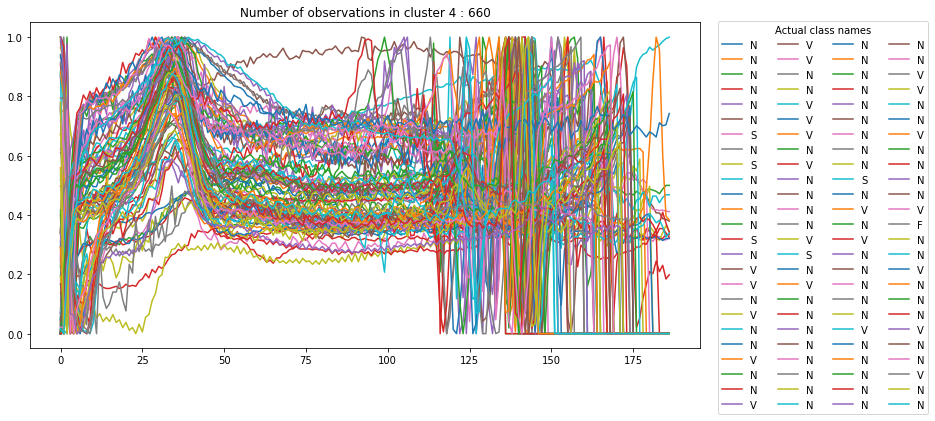

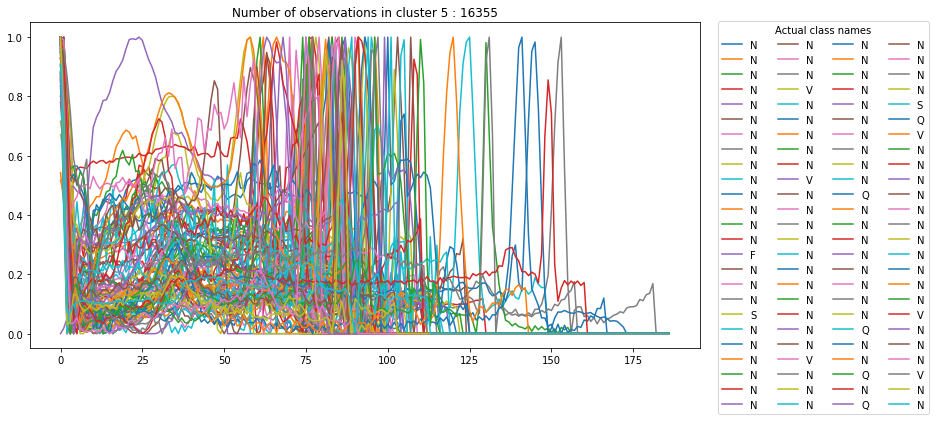

In [ ]:
#Plot for Cluster 1
plot_100samples(0, gmm_df, (1.02, 1.02), 4)
#Plot for Cluster 2
plot_100samples(1, gmm_df, (1.02, 1.02), 4)
#Plot for Cluster 3
plot_100samples(2, gmm_df, (1.02, 1.02), 4)
#Plot for Cluster 4
plot_100samples(3, gmm_df, (1.02, 1.02), 4)
#Plot for Cluster 5
plot_100samples(4, gmm_df, (1.02, 1.02), 4)

Final insights:
* fowlkes_mallows_score is 0.73 for K-means, & 0.72 for gmm.
* If you look at the patterns, we can say that both methods showing unique patterns in each cluster.
* From 3D plots, we can say that, clusters generated from GMM are well separated compared to K-means.
* We found some wrongly clustered observations in most of the clusters for both methods. In most of the clusters the normal beats class is present, it seems normal beats signals have some co-relation with other signals.

Note:
* This method will not applicable if we don't know the ground truth/actual labels.